# Mod 1 Assessment

### Congratulations on making it to your first assessment! Just a few reminders before you continue:
- This should only take an hour, so be sure to manage your time effectively.
- Read the instructions carefully for specified variable names.

If there is any confusion on a question, please ask for clarification from an instructor. </br>Though we can't give you the answer, we can help clear up any misunderstandings and get you back on track.

### Import all the necessary libraries/packages with the appropriate alias.

In [1]:
import matplotlib as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

## Section 1: Loops & Dictionaries (10 minutes)
Create a nested dictionary of recipes, with keys at the top level and dictionaries as their associated values.

1. Create an empty dictionary named **`recipes`**.
1. Add three dishes as the **keys** of your dictionary (e.g. 'meat pie')
1. For each key, the **value** should be another dictionary consisting of `ingredient: amount` pairs. (eg `'sugar': 'two cups'`) Each dish should have three ingredients.
1. Write a function called **`shopping_list`** to process the recipe dictionary. This function should loop through the recipes and return a single list of all ingredients needed across all recipes.

In [2]:
recipes = {'daal':{'lentils': 'half cup', 'water':'three cups', 'garam masala':'one tablespoon'}, 
           'jeera rice':{'rice': 'half cup', 'water':'one cup', 'cumin seeds':'one teaspoon'}, 
           'yogurt':{'milk':'two cups', 'culture':'one tablespoon', 'water':'as needed'}}

In [37]:
def shopping_list(recipe_dict):
    shopping_list = []
    for i in recipe_dict.values(): 
        shopping_list.append(i)

shopping_list(recipes)

## Section 2: Data cleaning (15 Minutes)
Read data from `./data/weatherAUS.csv` and assign it to a variable named **`weather_df`**.
1. Add a `day`, `month`, and `year` column (three new columns) using the values from the `Date` column
1. Assign the variable **`incomplete_columns`** to a list of column names with missing values
1. Drop all columns except `day`, `month`, `year`, `Rainfall`, and `Sunshine`
1. Drop rows with missing values for `Rainfall`
1. Assign the variable **`mean_sunshine`** to the mean value of `Sunshine` in `weather_df`
1. Fill all `Sunshine` NaNs with the value of `mean_sunshine`

In [4]:
weather_df = pd.read_csv('data/weatherAUS.csv')
weather_df.Date
pd.to_datetime(weather_df['Date'])
weather_df['day'] = pd.DatetimeIndex(weather_df['Date']).day
weather_df['month'] = pd.DatetimeIndex(weather_df['Date']).month
weather_df['year'] = pd.DatetimeIndex(weather_df['Date']).year
weather_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,day,month,year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,8.0,NaN,16.9,21.8,No,0.0,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,NaN,NaN,17.2,24.3,No,0.0,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,NaN,2.0,21.0,23.2,No,0.0,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,NaN,NaN,18.1,26.5,No,1.0,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,7.0,8.0,17.8,29.7,No,0.2,No,5,12,2008


In [5]:
incomplete_columns = weather_df.columns[weather_df.isnull().any()]
incomplete_columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [12]:
# Drop all columns except day, month, year, Rainfall, and Sunshine
weather_df.columns
weather_df.drop(columns=['Date', 'Location', 'MinTemp', 'MaxTemp', 'Evaporation','WindGustDir','WindGustSpeed', 
                         'WindDir9am', 'WindDir3pm','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
                         'Pressure9am', 'Pressure3pm', 'Cloud9am','Cloud3pm','Temp9am','Temp3pm', 'RainToday',
                         'RISK_MM', 'RainTomorrow']
# Drop rows with missing values for Rainfall
weather_df.dropna(subset=['Rainfall']).info()

SyntaxError: invalid syntax (<ipython-input-12-c687650f5666>, line 8)

In [11]:
mean_sunshine = weather_df['Sunshine'].mean()
mean_sunshine
# Fill all Sunshine NaNs with the value of mean_sunshine
weather_df.Sunshine.fillna(value = mean_sunshine)

0         7.628668
1         7.628668
2         7.628668
3         7.628668
4         7.628668
            ...   
164639    7.628668
164640    7.628668
164641    7.628668
164642    7.628668
164643    7.628668
Name: Sunshine, Length: 164644, dtype: float64

## Section 3: Visualization (15 Minutes)

As best you can, recreate this bar chart created in Google Sheets using Python.  You may use Matplotlib, Seaborn, or any other graphing library you came across.

<img src="./data/chart.jpg" alt="chart to recreate" width="500"/>

Text(0.5, 1.0, 'Count by Category')

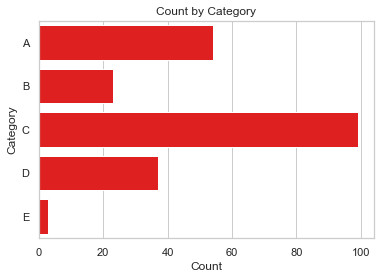

In [29]:
d = {'Category': ['A', 'B', 'C', 'D', 'E'], 'Count': [54, 23, 99, 37, 3]}
df = pd.DataFrame(data=d)
df
sns.set(style="whitegrid")
sns.barplot(x="Count", y="Category", data=df, color="red").set_title('Count by Category')

## Section 4: Github (5 Minutes)

Follow the instructions at https://github.com/enkeboll/dcds-111819-gifs, and make sure to check your email to confirm your collaborator status!

When finished, submit your assessment as `mod1_assessment.ipynb` (do not change the name, please!) at [this Google form](https://docs.google.com/forms/d/e/1FAIpQLSe65CBEptywZH048tq7caQL_9CvMs1k0C8EPY80FxvWESBdIg/viewform?usp=sf_link)